In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


## Jeminan hommat alkaa tästä

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

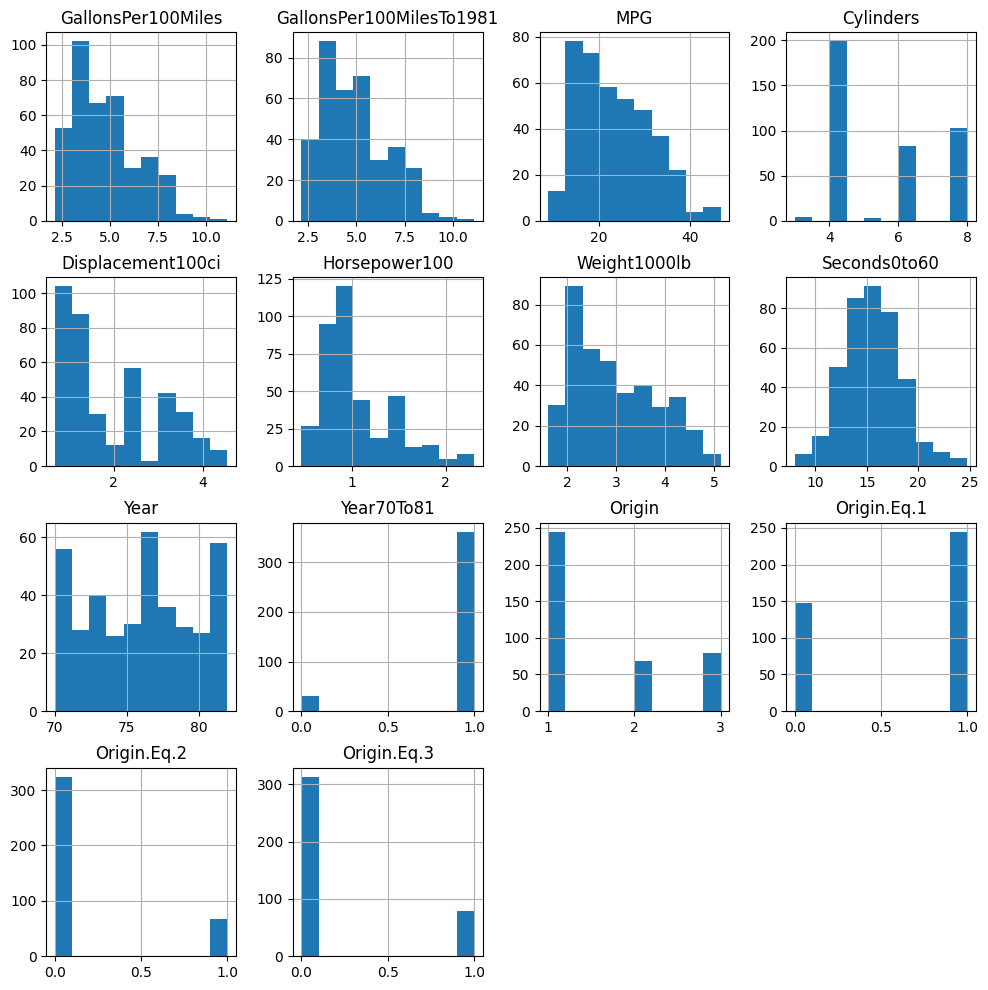

In [4]:
df.info()
df.describe()
df.hist(figsize=(12, 12))
plt.show()

In [5]:
print(df.isnull().sum())  # This will show you the count of missing values in each column


GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64


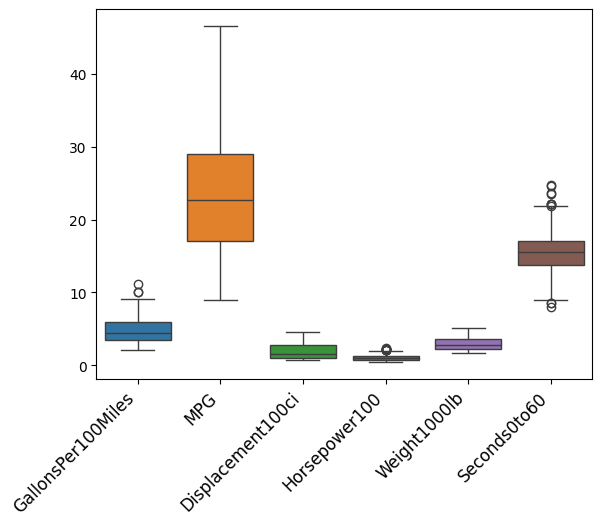

<Figure size 1000x600 with 0 Axes>

In [6]:
# Boxplot to detect outliers in numeric columns only
sns.boxplot(data=df[['GallonsPer100Miles', 'MPG', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']])

# Rotate x-axis labels to make them more readable and add more space
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust rotation, alignment, and font size

# Increase figure size for more space between labels
plt.figure(figsize=(10, 6))

plt.show()

In [7]:
numeric_df = df.select_dtypes(include=['number'])

<function matplotlib.pyplot.show(close=None, block=None)>

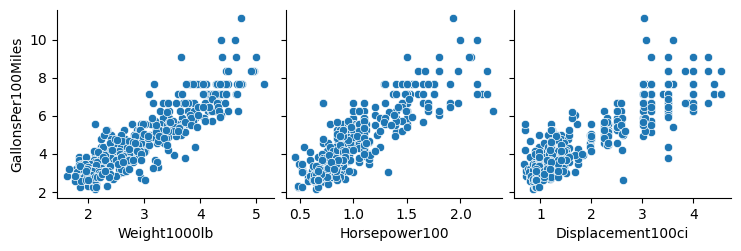

In [8]:
sns.pairplot(df, x_vars=['Weight1000lb', 'Horsepower100', 'Displacement100ci'], y_vars='GallonsPer100Miles')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

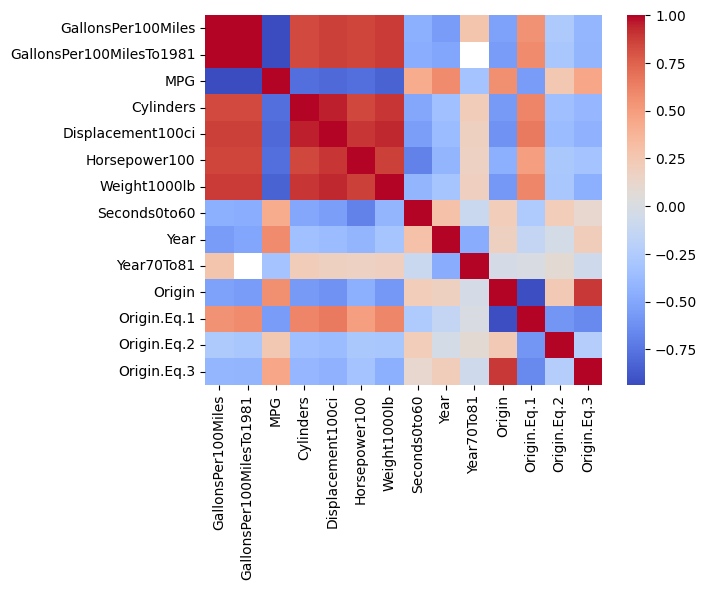

In [9]:
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show

In [10]:
min_weight = df['Weight1000lb'].min()
max_weight = df['Weight1000lb'].max()
print(f"Min Weight (1000lb): {min_weight}")
print(f"Max Weight (1000lb): {max_weight}")

Min Weight (1000lb): 1.613
Max Weight (1000lb): 5.14


## Build the linear regression model (yhä jemina)

In [11]:
X = df[['Weight1000lb', 'Horsepower100', 'Displacement100ci']]
y = df['GallonsPer100Miles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

## Evaluate the model

In [14]:
print('R²:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.8374899628496058
MSE: 0.4165039558786529


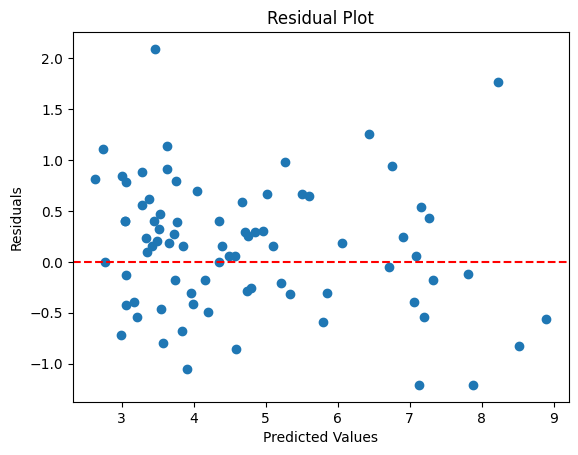

In [15]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

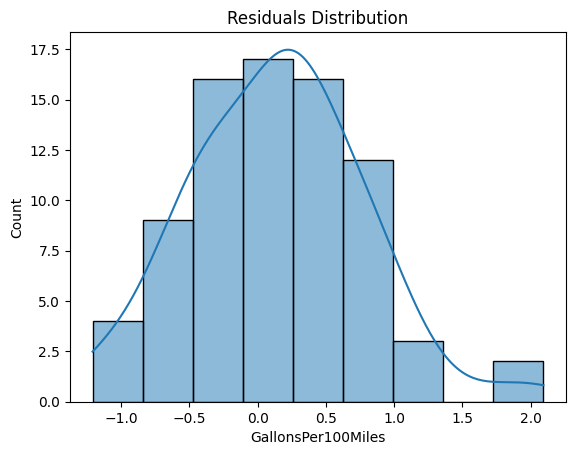

In [16]:
# Plot distribution of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

## Test the model (yhäkin jemina)

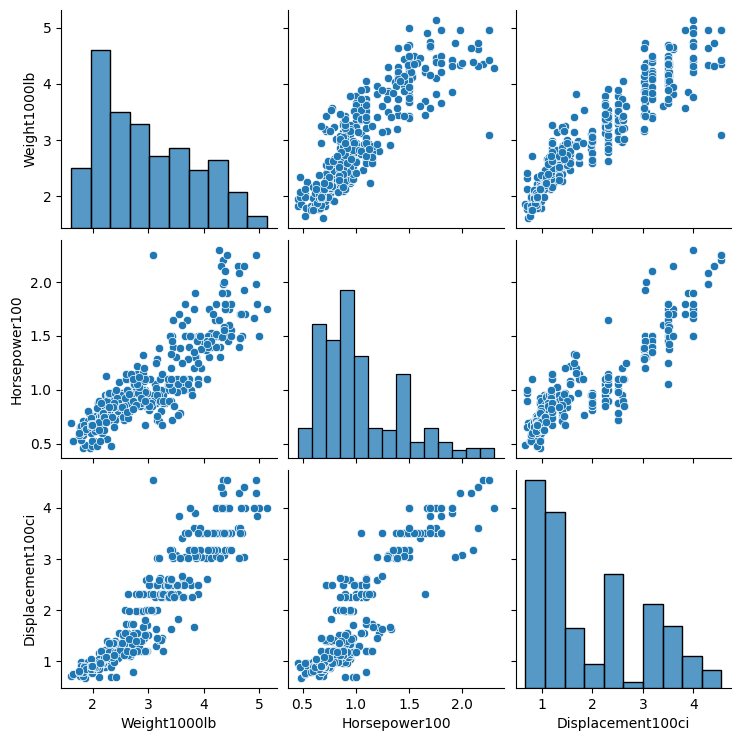

In [17]:
# Visualize distribution of features
sns.pairplot(df[['Weight1000lb', 'Horsepower100', 'Displacement100ci']])
plt.show()


In [18]:
# Create a DataFrame with appropriate column names
new_values_interpolation = pd.DataFrame([[3000, 200, 2.0]], columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])
new_values_extrapolation = pd.DataFrame([[5000, 400, 5.0]], columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])

# Make predictions
interp_prediction = model.predict(new_values_interpolation)
extrap_prediction = model.predict(new_values_extrapolation)

print("Interpolation Prediction:", interp_prediction)
print("Extrapolation Prediction:", extrap_prediction)

Interpolation Prediction: [3192.34381124]
Extrapolation Prediction: [5413.92153374]


## Iteration and justification

In [19]:
# Example: Try different features
X_alt = df[['Weight1000lb', 'Cylinders', 'Displacement100ci']]

model_alt = LinearRegression()
model_alt.fit(X_train, y_train)

# Predictions
y_pred_alt = model_alt.predict(X_test)

# Evaluate performance
print("R²:", r2_score(y_test, y_pred_alt))
print("MSE:", mean_squared_error(y_test, y_pred_alt))
print("MAE", mean_absolute_error(y_test, y_pred_alt))

R²: 0.8374899628496058
MSE: 0.4165039558786529
MAE 0.5136699426557357


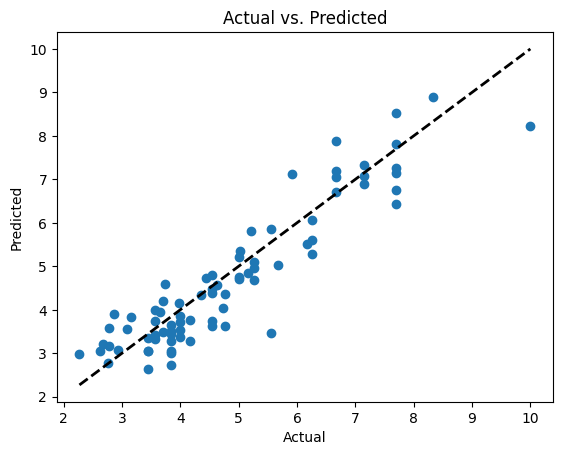

In [20]:
# Plot Predicted vs Actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

## Tästä eteenpäin en oo tehny enkä koskenu (paitsi corr toimii nyt)

<Axes: >

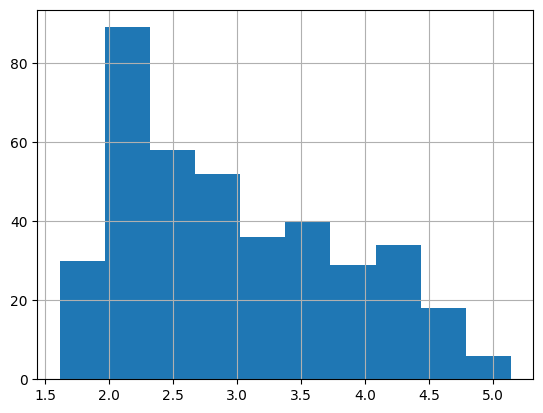

In [21]:
df['Weight1000lb'].hist()

<Axes: >

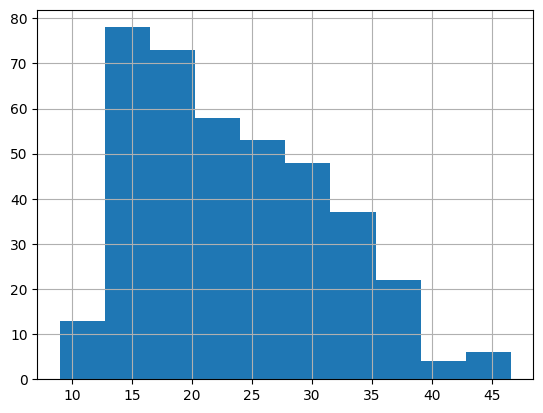

In [22]:
df['MPG'].hist()

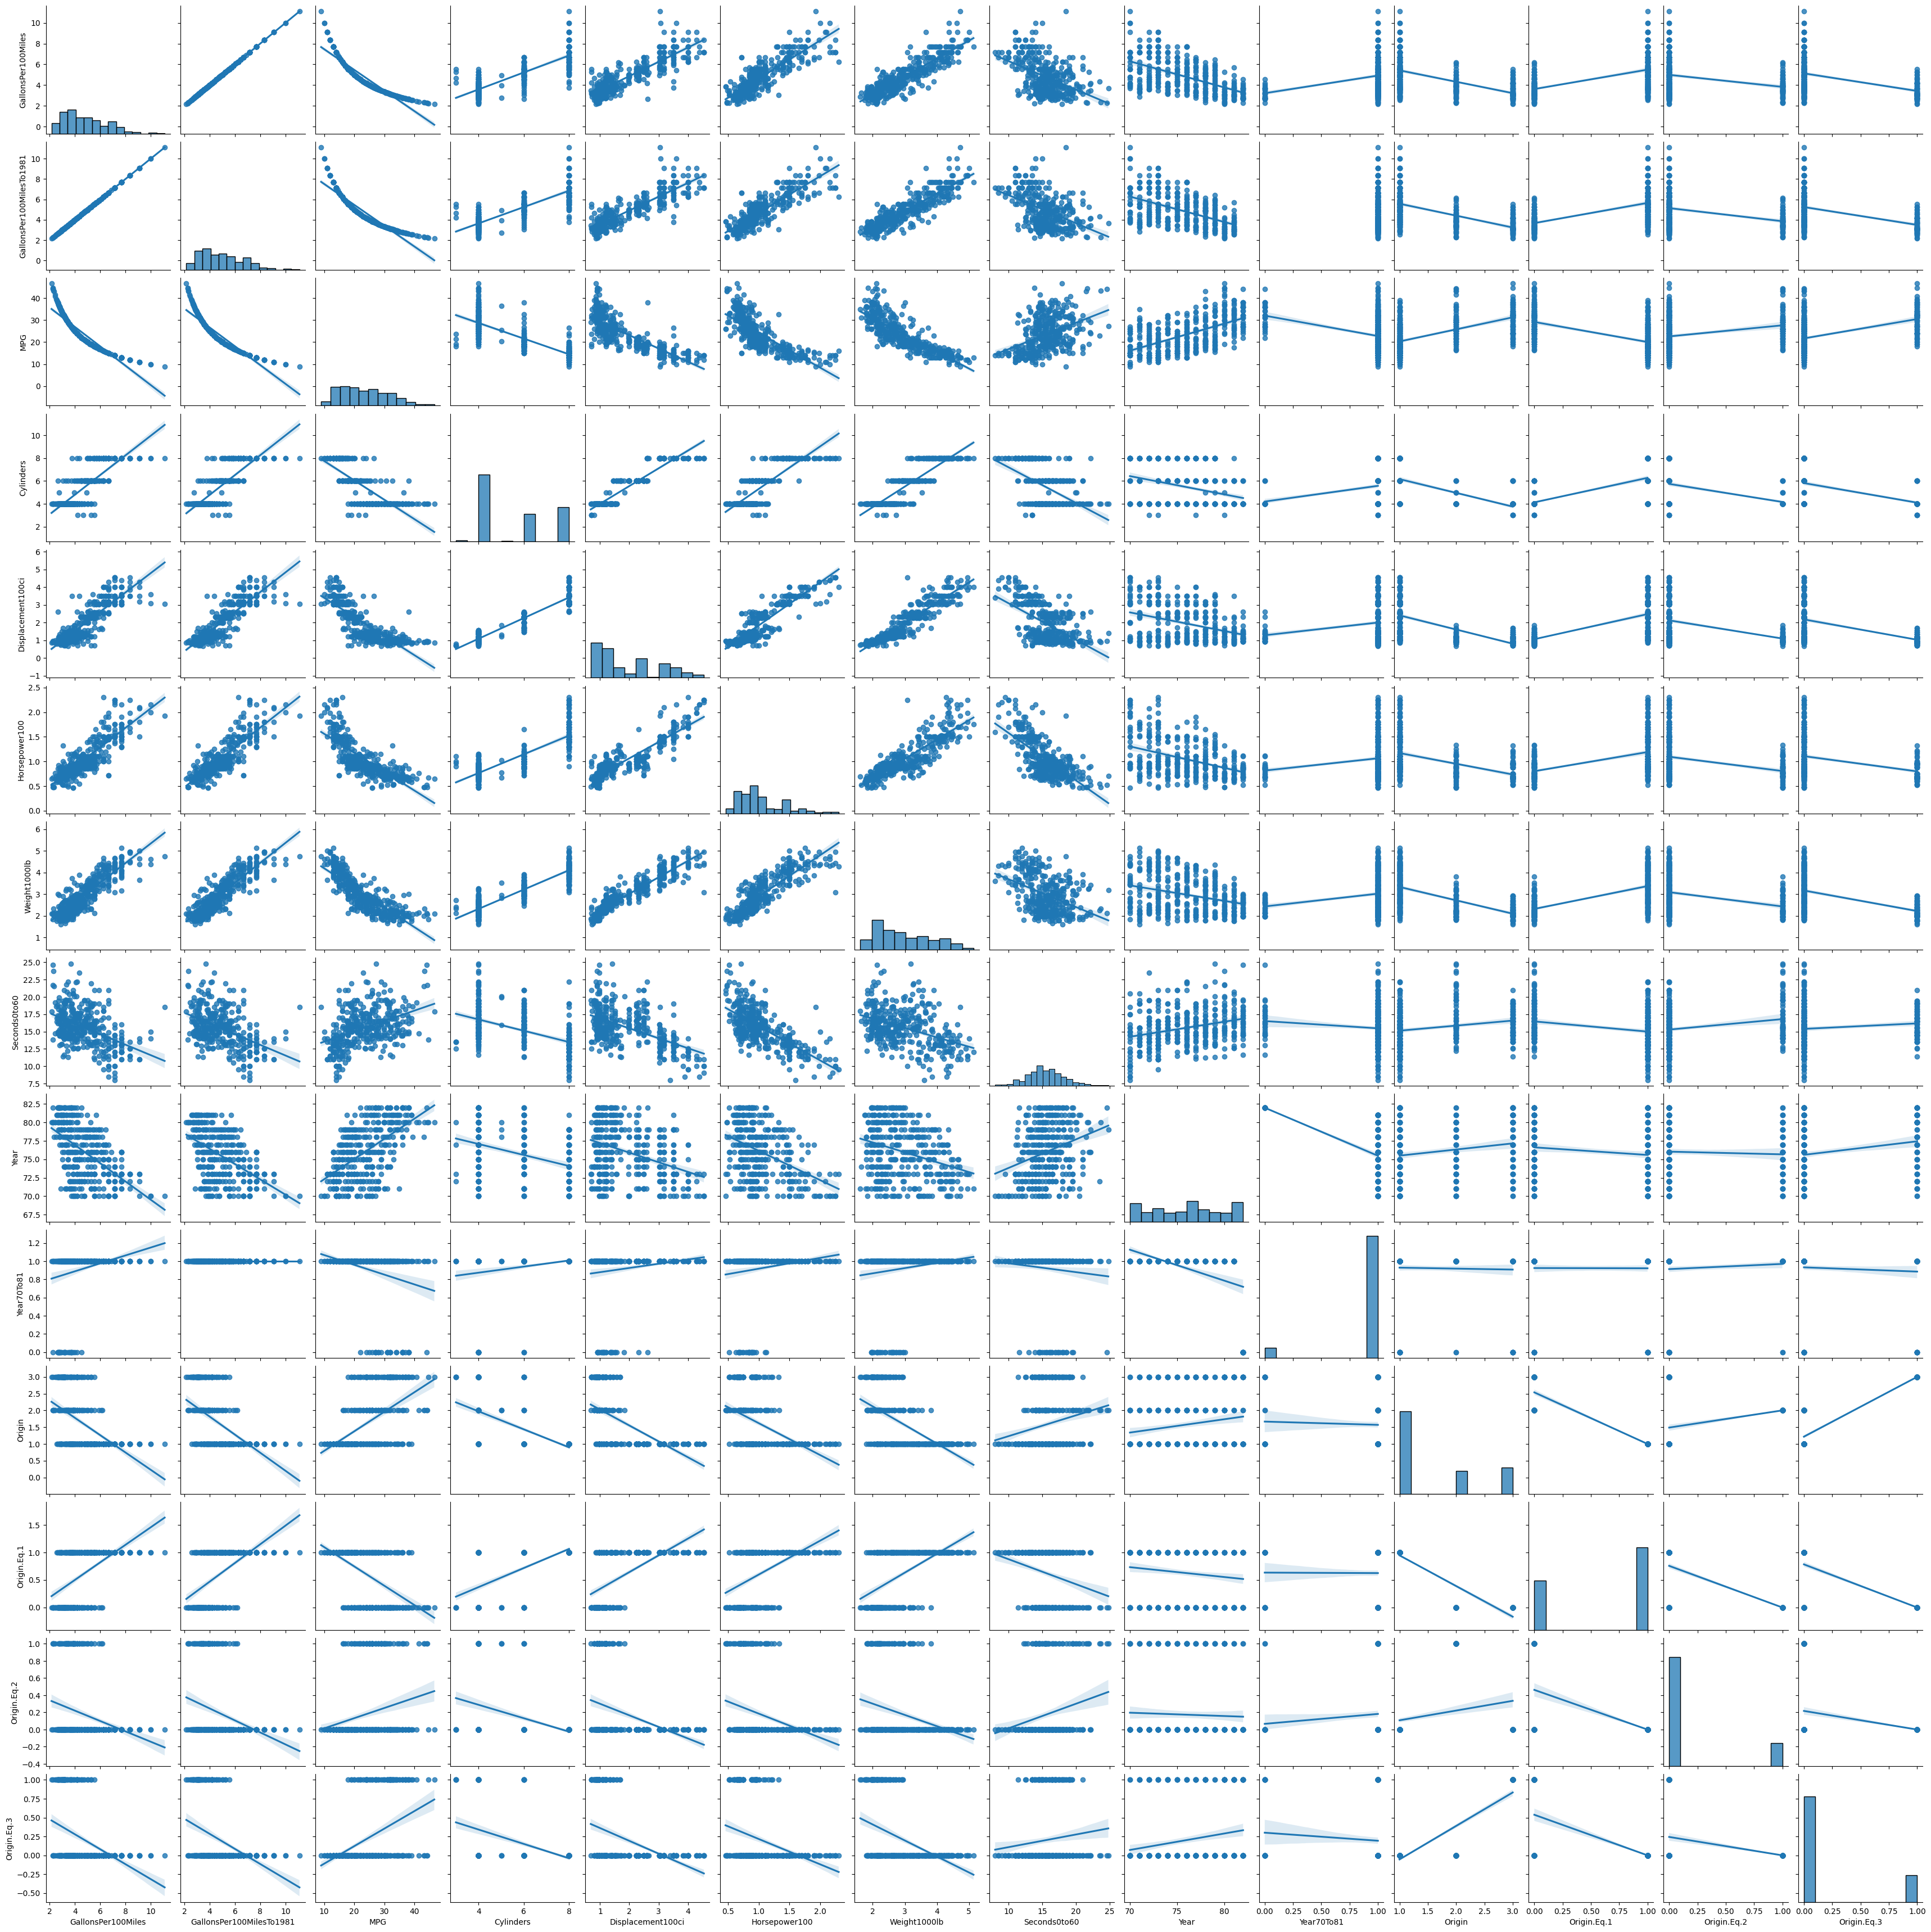

In [23]:
# let's see the scatter plots and have the regression line fitted also for illustrations
sns.pairplot(df, kind = 'reg')

<Axes: >

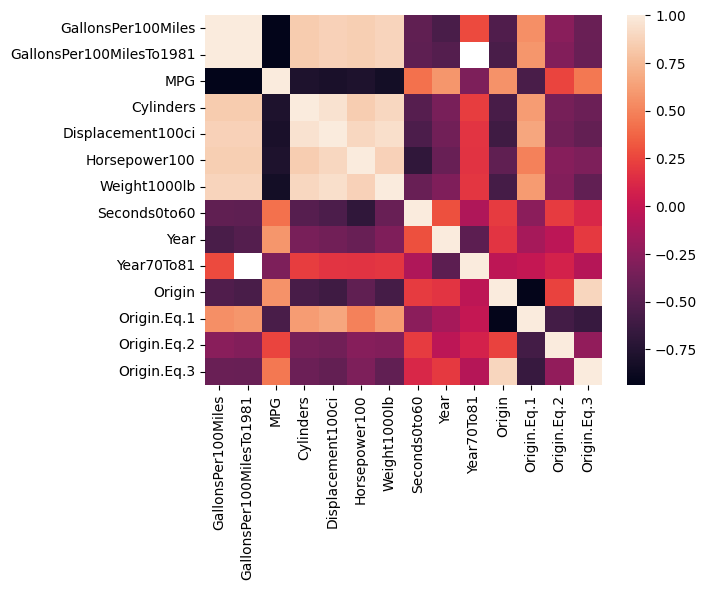

In [24]:
# heatmap korrelaatiokertoimista
#sns.heatmap(df.corr(), annot = True)
sns.heatmap(numeric_df.corr())

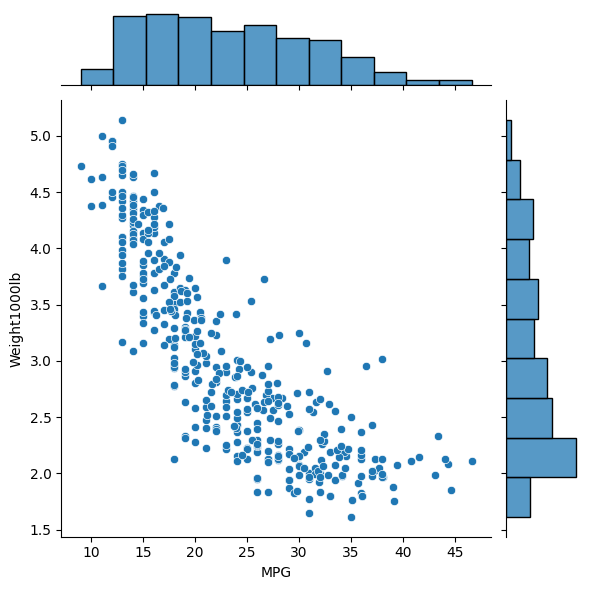

In [25]:
# Let's check MPG and Weight1000lb as a jointplot
ax1 = sns.jointplot(data = df, x = 'MPG', y = 'Weight1000lb')
#ax1 = sns.jointplot(data = df, x = 'MPG', y = 'Horsepower100')

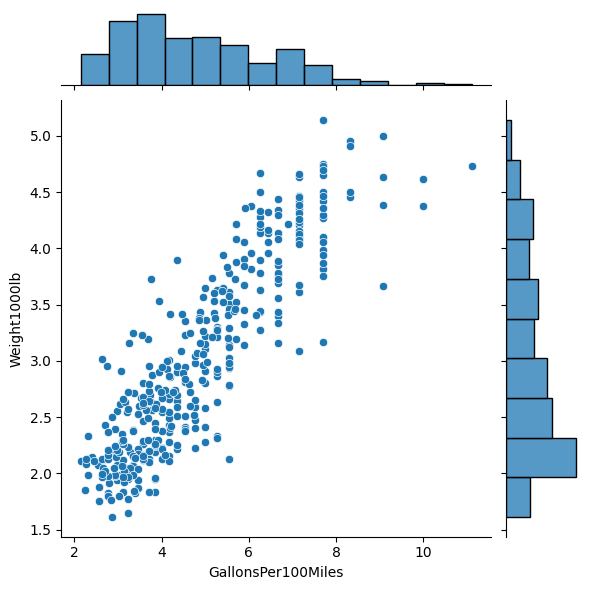

In [26]:
# On the other hand, let's see what happens if we use X='GallonsPer100Miles' instead
ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Weight1000lb')
#ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Horsepower100')
#ax1 = sns.jointplot(data = df, x = 'Weight1000lb', y = 'GallonsPer100Miles', kind='reg')

In [27]:
# Let's prepare the data for the regression model
X = df['Weight1000lb'].to_frame()  # to_frame() makes it dataframe as now it would only be a Series!

# This is the independent variable -> you could have taken more variables into your model as there can be more than one dependent variables

In [28]:
y = df['GallonsPer100Miles']  # This is your dependent variable - or the target variable that you want to predict 

In [29]:
# Now that we have the data, let's start training the model

In [30]:
fuel_model = LinearRegression().fit(X,y)

In [31]:
fuel_model.coef_

array([1.73378735])

In [32]:
fuel_model.intercept_

-0.3802549901551391

In [33]:
# Let's just predict first that how many GallonsPer100Miles would it take based on the model if the car would weight 1000lb
fuel_model.predict(pd.DataFrame([3]))   # This value is on the interpolation range

c:\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.82110705])

In [34]:
fuel_model.predict(pd.DataFrame([1]))   # This value is on the extrapolation range

c:\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.35353236])

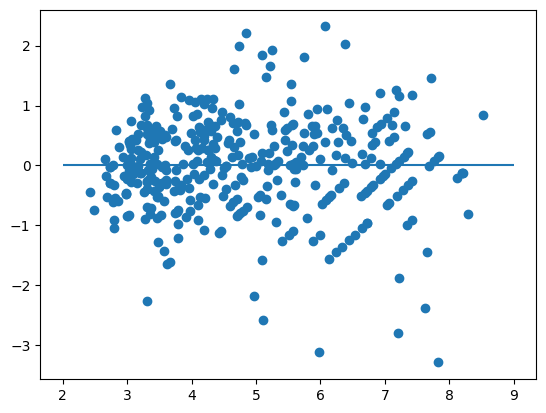

In [35]:
#Let's plot the model error terms as a scatterplot
#X = 'Weight1000lb'
#y = 'GallonsPer100Miles'
plt.scatter(fuel_model.predict(X), fuel_model.predict(X)-y)

plt.hlines(y=0,xmin=2,xmax=9)


In [36]:
#Coefficient of determination
fuel_model.score(X,y)

0.7833240828863839

In [ ]:
# Hence, the model explains 78.3% of fuel consumtion

In [37]:
y = df['GallonsPer100Miles']
X1 = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]

In [38]:
#from sklearn.linear_model import LinearRegression

fuel_model1 = LinearRegression().fit(X1,y)
fuel_model2 = LinearRegression().fit(X2,y)
fuel_model3 = LinearRegression().fit(X3,y)

In [41]:
#fuel_model1.predict(X1)
print(fuel_model1.score(X1,y))
print(fuel_model2.score(X2,y))
print(fuel_model3.score(X3,y))

0.8207948199718269
0.8158213878482583
0.7529103569205208


In [42]:
fuel_model3.predict([[4, 1.5, 8], [6, 2, 6]])

c:\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.95732192, 4.82763339])

## Choosing best model and justification

In [43]:
# Model comparison based on R² value
print(f"Fuel Model 1 R²: {fuel_model1.score(X1, y)}")
print(f"Fuel Model 2 R²: {fuel_model2.score(X2, y)}")
print(f"Fuel Model 3 R²: {fuel_model3.score(X3, y)}")

# Select the best model based on the highest R² value
best_model = max([(fuel_model1, fuel_model1.score(X1, y)), 
                  (fuel_model2, fuel_model2.score(X2, y)), 
                  (fuel_model3, fuel_model3.score(X3, y))], 
                 key=lambda x: x[1])[0]

print(f"Best model: {best_model}")


Fuel Model 1 R²: 0.8207948199718269
Fuel Model 2 R²: 0.8158213878482583
Fuel Model 3 R²: 0.7529103569205208
Best model: LinearRegression()


 Justification: We chose the model with the highest R² value as it explains the most variation in fuel consumption.

# Let's make predictions and evaluations (interpolation vs extraploration)

In [ ]:
# Define new values for interpolation (within the training range)
new_values_interpolation = pd.DataFrame([[3000, 200, 2.0]], 
                                        columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])
interp_prediction = model.predict(new_values_interpolation)
print("Interpolation Prediction:", interp_prediction)

# Define new values for extrapolation (outside the training range)
new_values_extrapolation = pd.DataFrame([[5000, 400, 5.0]], 
                                        columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])
extrap_prediction = model.predict(new_values_extrapolation)
print("Extrapolation Prediction:", extrap_prediction)



# Model Error and Reliability Evaluation

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
print("R²:", r2_score(y_test, y_pred))  # R-squared
print("MSE:", mean_squared_error(y_test, y_pred))  # Mean Squared Error
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean Absolute Error

# Visualize the residuals (errors)
residuals = y_test - y_pred

# Plot Residuals vs Predicted Values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot distribution of residuals
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
